In [ ]:
# default_exp pymap

# Mapping in python

> Explore mapping in python

In [ ]:
#hide
from nbdev.showdoc import *

In [ ]:
import requests
import geopandas as gpd
import osmnx

### Toronto, Canada

##### Get geo data

In [ ]:
# Download and save toronto shape file
url = 'http://www.dmg.utoronto.ca/spatial/data/2001_TTS_TRAFFIC_ZONES_shp.zip'
with open('./data/2001_TTS_TRAFFIC_ZONES_shp.zip', 'wb') as f:
    r = requests.get(url)
    f.write(r.content)   

In [ ]:
toronto = gpd.read_file('zip://./data/2001_TTS_TRAFFIC_ZONES_shp.zip')

In [ ]:
toronto.head()

,GTA01,PD,REGION,geometry
0,1,7,1,"POLYGON ((617159.627 4827382.920, 617203.149 4..."
1,2,7,1,"POLYGON ((616272.177 4828985.354, 616253.920 4..."
2,3,8,1,"POLYGON ((616635.381 4831011.931, 616653.770 4..."
3,4,8,1,"POLYGON ((618245.176 4832760.935, 618265.362 4..."
4,5,8,1,"POLYGON ((617580.388 4830923.360, 617741.347 4..."


##### Get a polygon and plot its street networks

In [ ]:
# Get a polygon from one PD
apd = toronto[(toronto['GTA01'] == 3) & (toronto['PD'] == 8)]
apd_prj = apd.to_crs('epsg:4326')
apd_polygon = apd_prj['geometry'].iloc[0]

/home/danph/miniconda3/envs/ubdev/lib/python3.8/site-packages/osmnx/projection.py:72: FutureWarning: Assigning CRS to a GeoDataFrame without a geometry column is now deprecated and will not be supported in the future.
  gdf.crs = crs


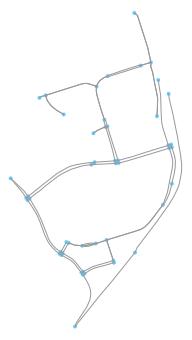

CPU times: user 432 ms, sys: 114 ms, total: 546 ms
Wall time: 4.16 s


In [ ]:
%%time
# Get street map
apd_grap = osmnx.graph_from_polygon(apd_polygon, network_type='drive')
fig, ax = osmnx.plot_graph(apd_grap)
fig.show()

In [ ]:
# Save file
osmnx.save_graph_shapefile(apd_grap,"./data/a_pd_network_shape.zip")

/home/danph/miniconda3/envs/ubdev/lib/python3.8/site-packages/osmnx/save_load.py:140: FutureWarning: Assigning CRS to a GeoDataFrame without a geometry column is now deprecated and will not be supported in the future.
  gdf_nodes.crs = G_save.graph['crs']


In [ ]:
!ls ./data

2001_TTS_TRAFFIC_ZONES_shp.zip	data	       nbh.csv	       nodes.geojson
a_pd_network_shape		edges.geojson  neiberhood.txt


In [ ]:
gdf_nodes, gdf_edges = osmnx.graph_to_gdfs(apd_grap)

In [ ]:
gdf_nodes.head()

,y,x,osmid,highway,geometry
298567043,43.609356,-79.560223,298567043,traffic_signals,POINT (-79.56022 43.60936)
1363241220,43.608425,-79.558769,1363241220,traffic_signals,POINT (-79.55877 43.60842)
1363241221,43.608479,-79.558646,1363241221,traffic_signals,POINT (-79.55865 43.60848)
298567046,43.610000,-79.559705,298567046,stop,POINT (-79.55970 43.61000)
303450629,43.614120,-79.558048,303450629,NaN,POINT (-79.55805 43.61412)


In [ ]:
gdf_edges.head()

,u,v,key,osmid,oneway,lanes,name,highway,length,geometry,maxspeed,ref,bridge
0,298567043,298567070,0,27208768,True,2,Sherway Gate,tertiary,12.707,"LINESTRING (-79.56022 43.60936, -79.56014 43.6...",NaN,NaN,NaN
1,298567043,1363241220,0,"[284851424, 460667968]",True,"[2, 3]",The West Mall,secondary,158.892,"LINESTRING (-79.56022 43.60936, -79.56016 43.6...",60,NaN,NaN
2,1363241220,202309717,0,460667967,True,2,The West Mall,secondary,15.013,"LINESTRING (-79.55877 43.60842, -79.55866 43.6...",60,NaN,NaN
3,1363241221,1363241220,0,236870639,True,3,Evans Avenue,secondary,11.526,"LINESTRING (-79.55865 43.60848, -79.55877 43.6...",NaN,NaN,NaN
4,1363241221,298567070,0,"[186986512, 236870643, 273499094]",True,"[2, 4]",The West Mall,secondary,163.911,"LINESTRING (-79.55865 43.60848, -79.55876 43.6...",60,NaN,NaN


In [ ]:
gdf_edges.head()

,u,v,key,osmid,oneway,lanes,name,highway,length,geometry,maxspeed,ref,bridge
0,298567043,298567070,0,27208768,True,2,Sherway Gate,tertiary,12.707,"LINESTRING (-79.56022 43.60936, -79.56014 43.6...",NaN,NaN,NaN
1,298567043,1363241220,0,"[284851424, 460667968]",True,"[2, 3]",The West Mall,secondary,158.892,"LINESTRING (-79.56022 43.60936, -79.56016 43.6...",60,NaN,NaN
2,1363241220,202309717,0,460667967,True,2,The West Mall,secondary,15.013,"LINESTRING (-79.55877 43.60842, -79.55866 43.6...",60,NaN,NaN
3,1363241221,1363241220,0,236870639,True,3,Evans Avenue,secondary,11.526,"LINESTRING (-79.55865 43.60848, -79.55877 43.6...",NaN,NaN,NaN
4,1363241221,298567070,0,"[186986512, 236870643, 273499094]",True,"[2, 4]",The West Mall,secondary,163.911,"LINESTRING (-79.55865 43.60848, -79.55876 43.6...",60,NaN,NaN


In [ ]:
# Save into geojson file
gdf_nodes.to_file('./data/nodes.geojson', driver='GeoJSON')

In [ ]:
# Cannot save edges?
# gdf_edges.to_file('./data/edges.geojson', driver='GeoJSON')

### Melbourne, Australia